# Predicción



La prediccion se realiza sobre las imagenes preprocesadas en el primer notebook. 

### Sentinel 2 rgb nir swir diffsw

In [2]:
from unetseg.predict import PredictConfig, predict
from unetseg.evaluate import plot_data_results
import os

/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/

In [7]:
#!rm -rf /home/ro/basurales/data/data_results/
#!ls /home/ro/basurales/data/modelo/weights

UNet_basurales_6D_160_30_spe150.h5


Definimos el la configuracion para la predicción. Debemos pasar la ruta a las imagenes del dataset de prediccion y al modelo.

In [8]:

predict_config = PredictConfig(
                                    images_path=os.path.join('/home/ro/basurales/data/data_predict/','6D','100_100'), # ruta a las imagenes sobre las cuales queremos predecir
                                    results_path=os.path.join('/home/ro/basurales/data/data_results/','6D' ,'100_100'), # ruta de destino para nuestra predicción
                                    batch_size=16,
                                    model_path=os.path.join('/home/ro/basurales/data/modelo/weights/', 'UNet_basurales_6D_160_30_spe150.h5'),  #  ruta al modelo (.h5)
                                    height=160,
                                    width=160,
                                    n_channels=6,
                                    n_classes=1,
                                    class_weights= [0.8])
          
   

In [9]:
predict(predict_config)  # Ejecuta la predicción

Total images to predict (/home/ro/basurales/data/data_predict/6D/100_100/images/*.tif): 178235
After skipping existing results: 178235


  0%|          | 0/11140 [00:00<?, ?it/s]

100%|██████████| 11140/11140 [1:12:17<00:00,  2.57it/s]

Done!


Podemos ver algunos resultados preliminales de la prediccion

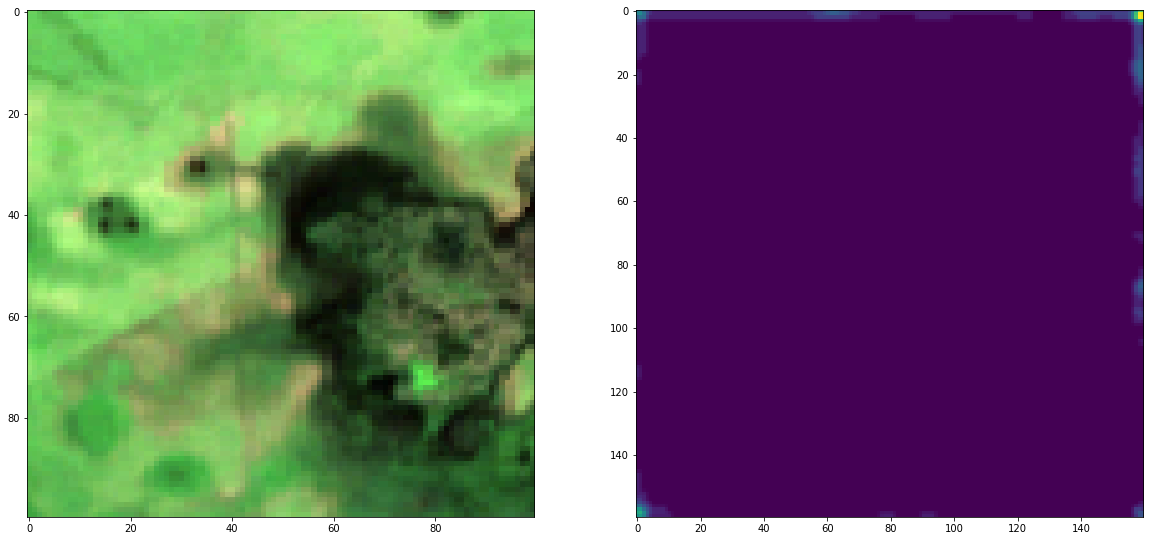

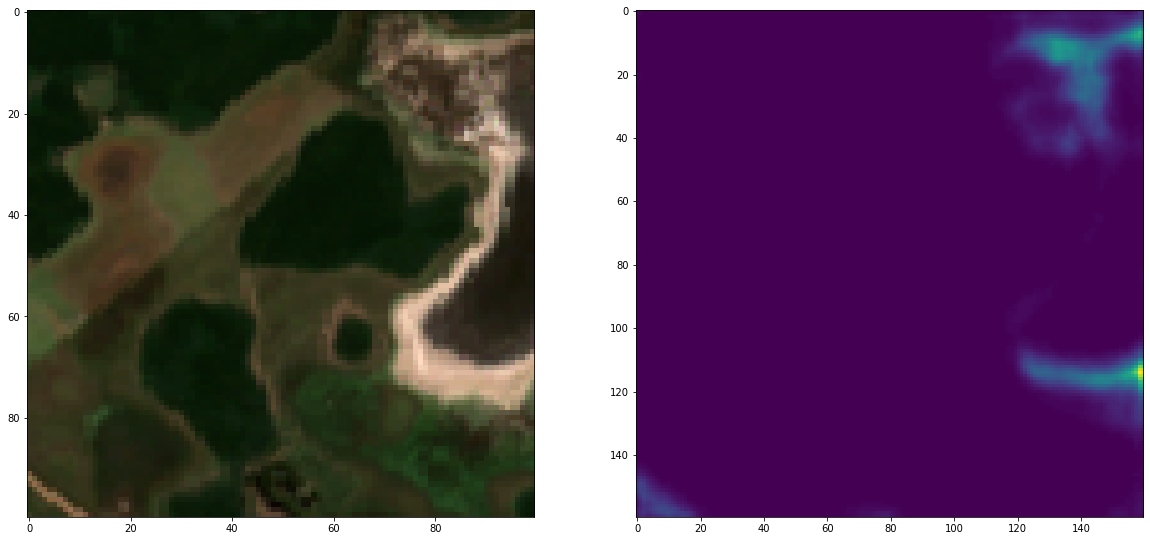

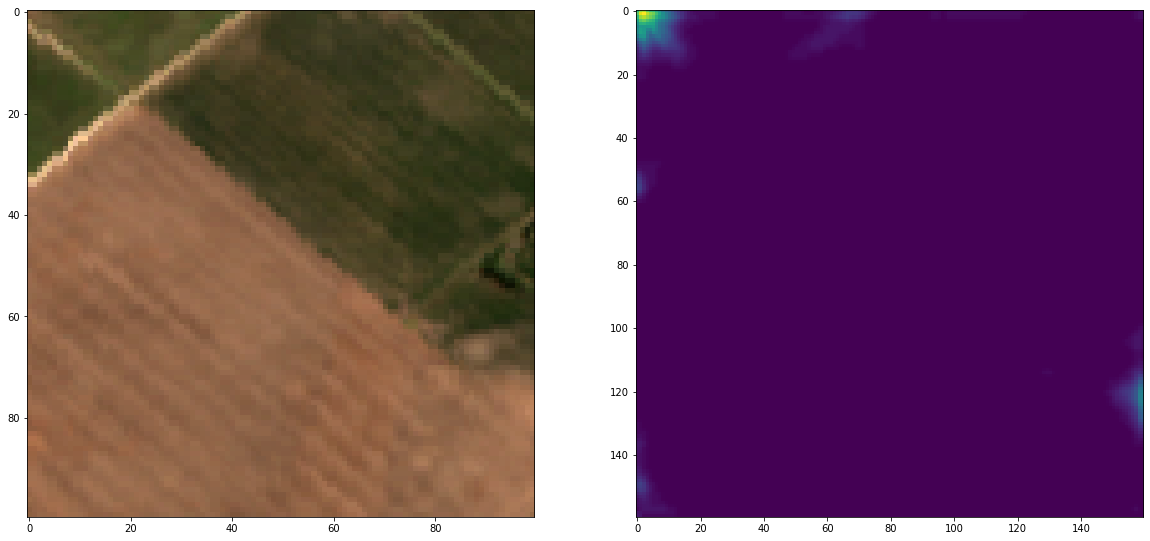

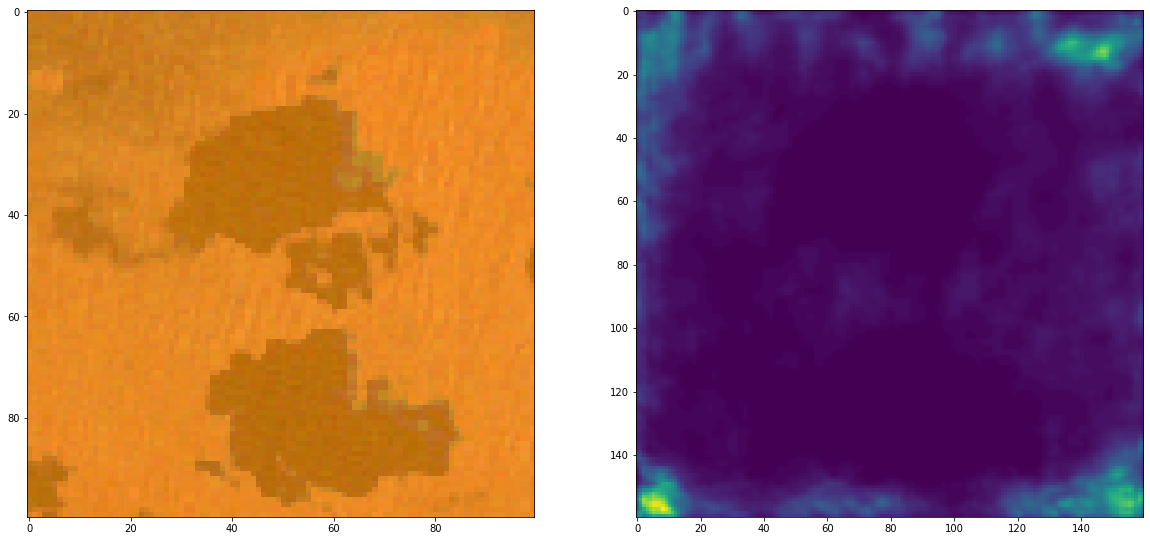

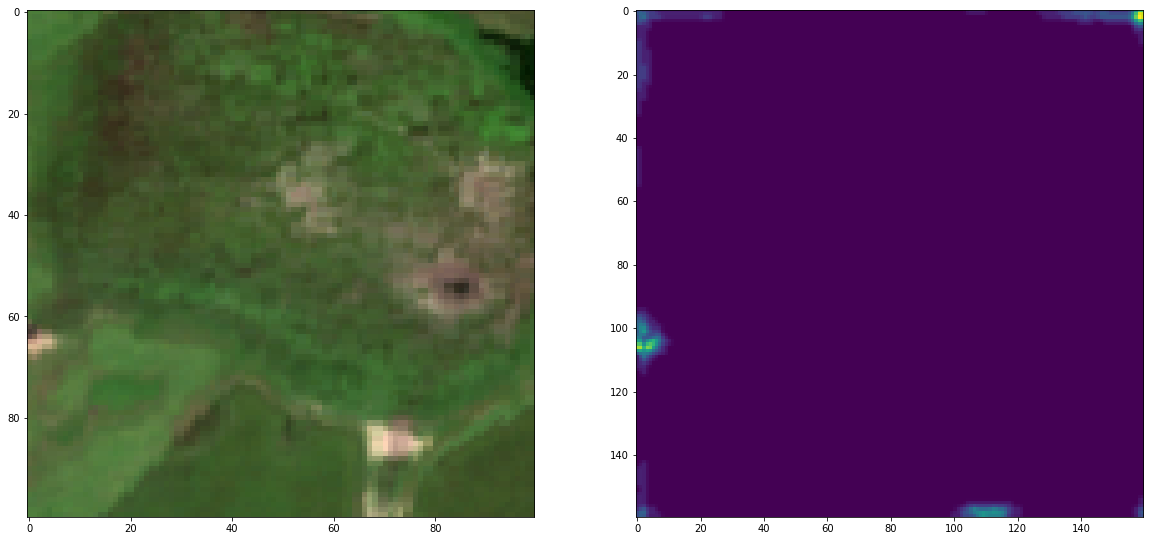

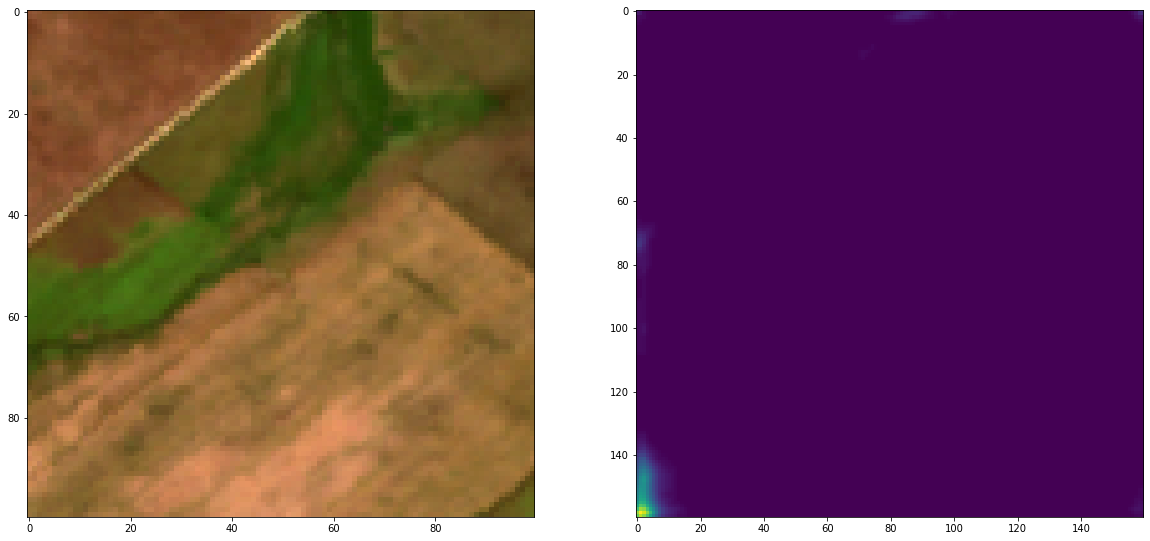

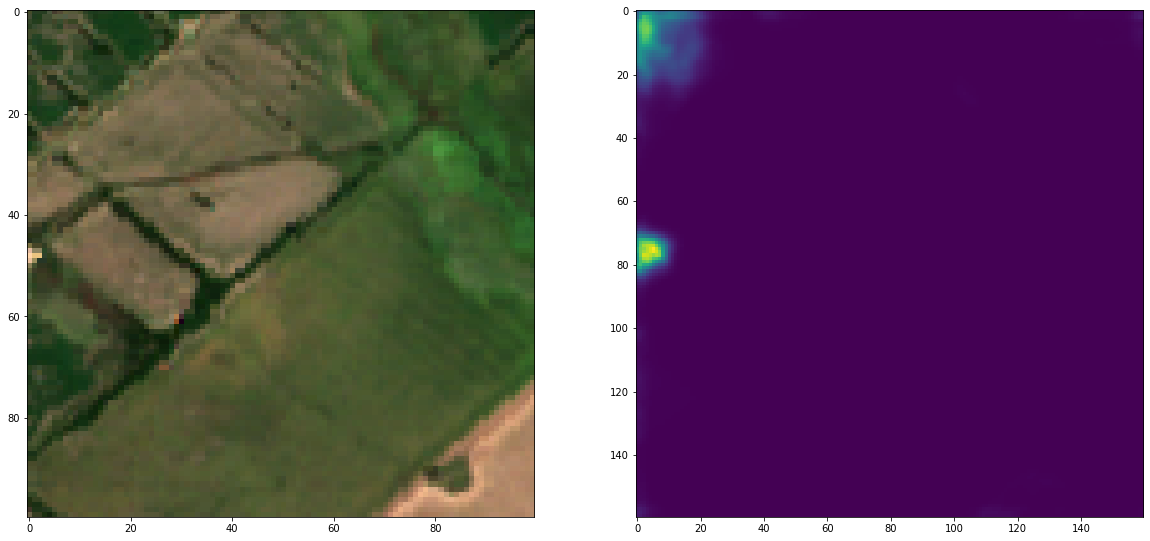

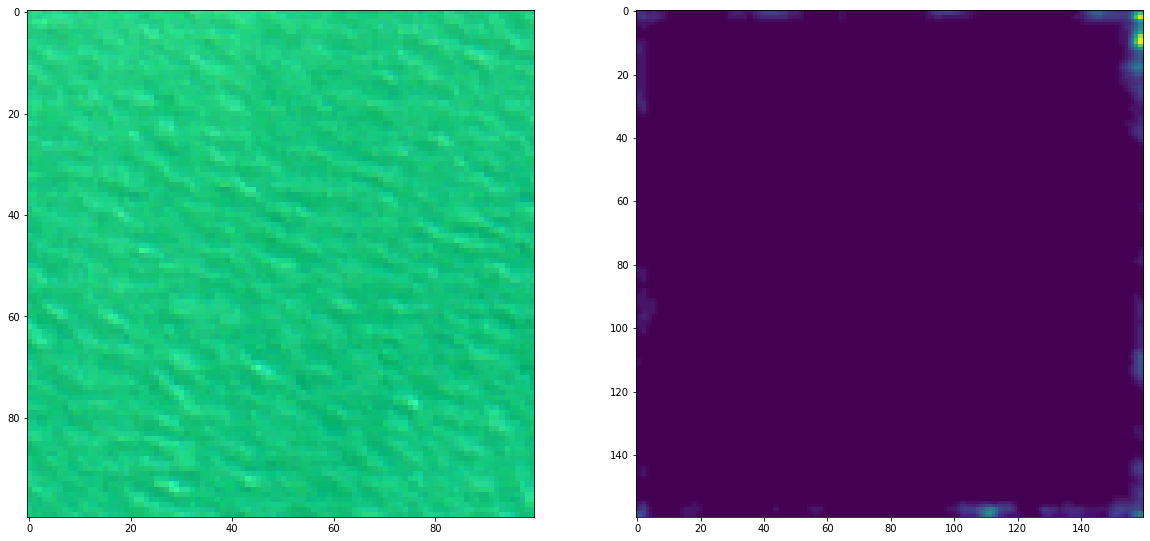

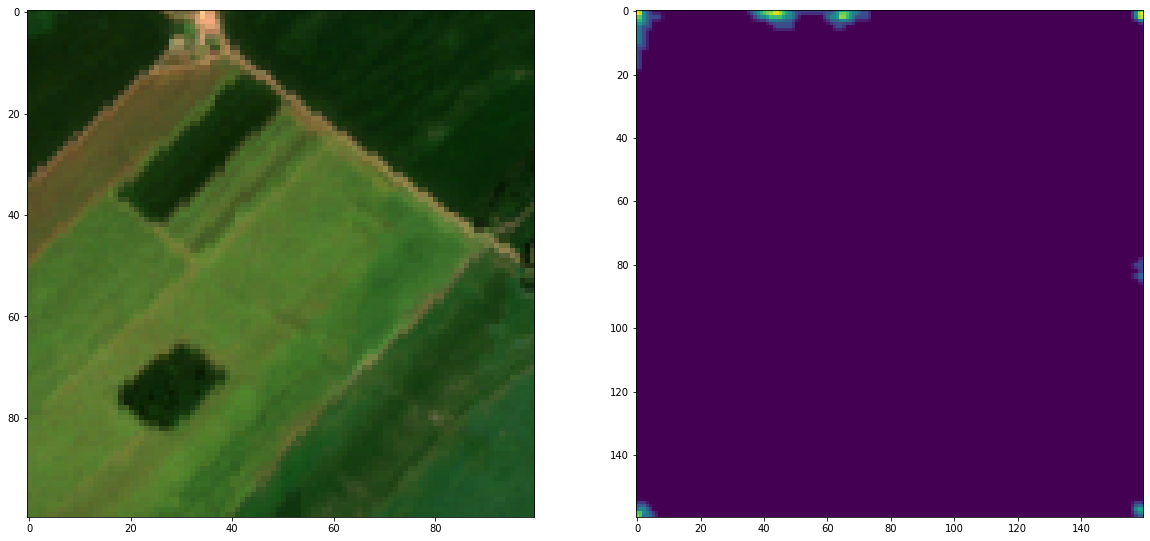

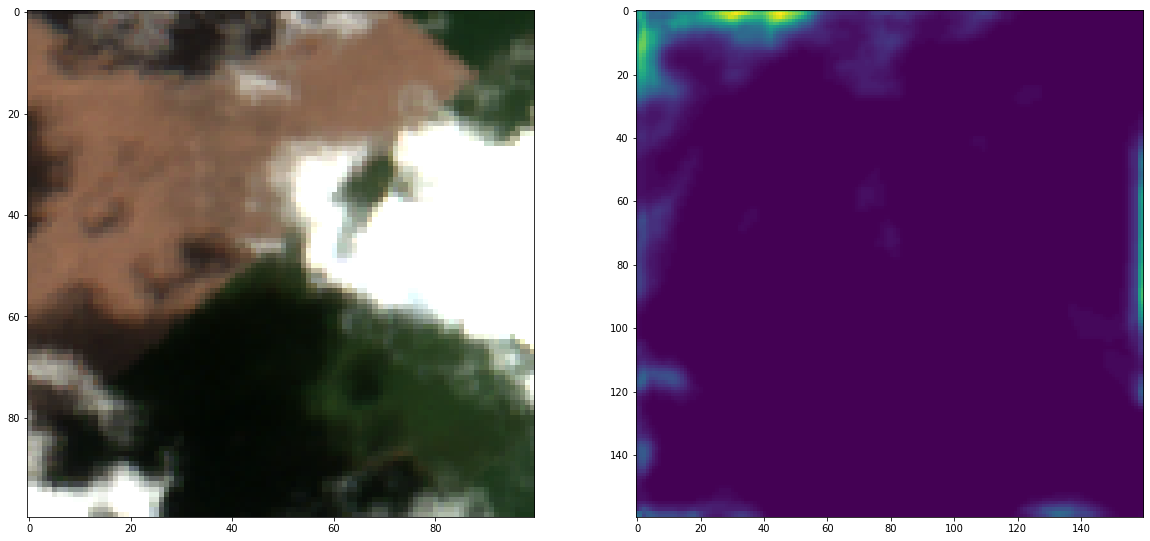

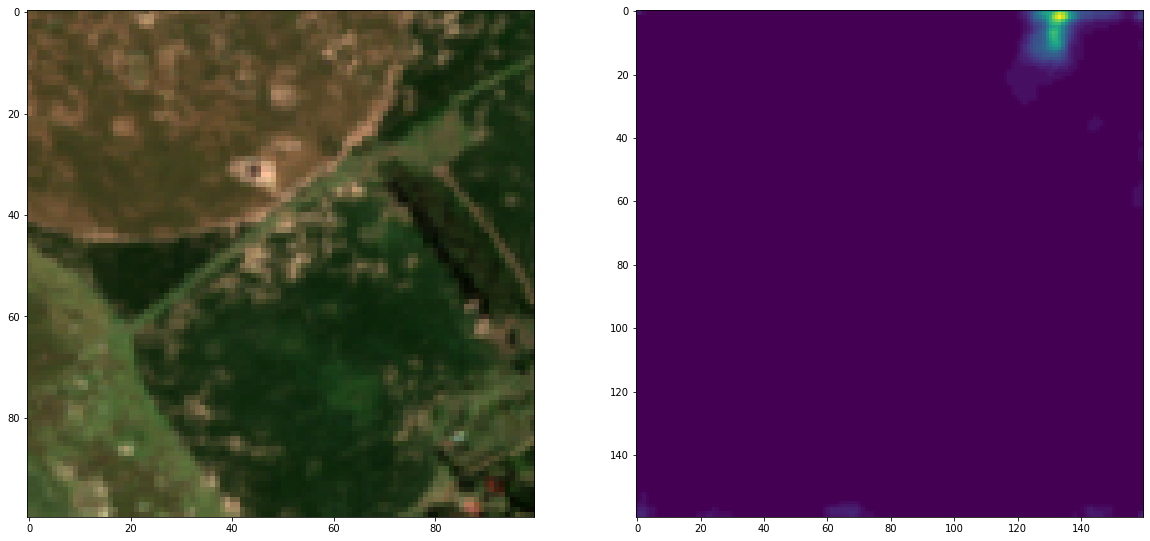

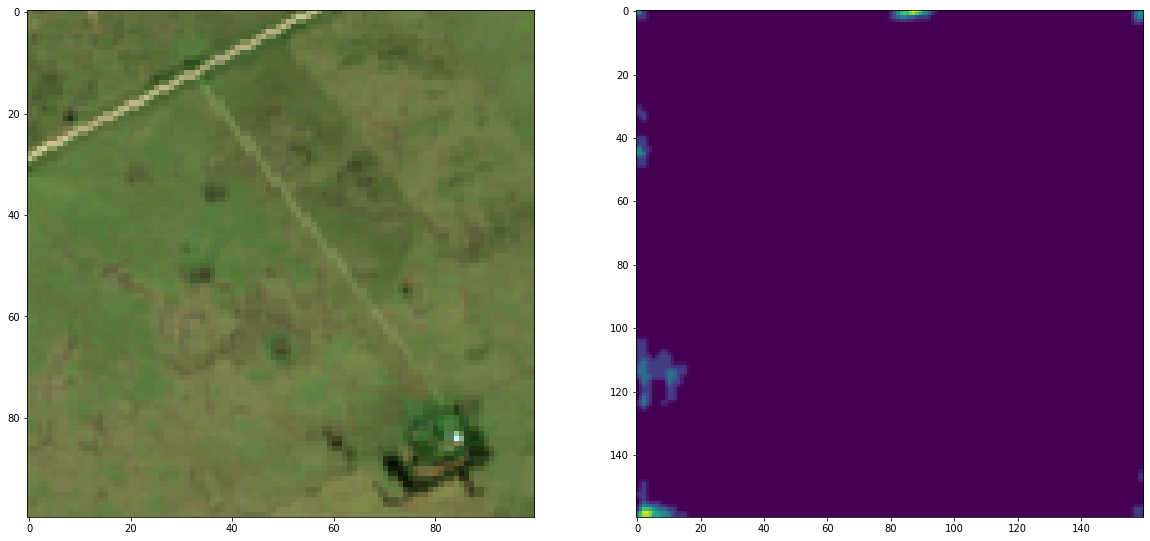

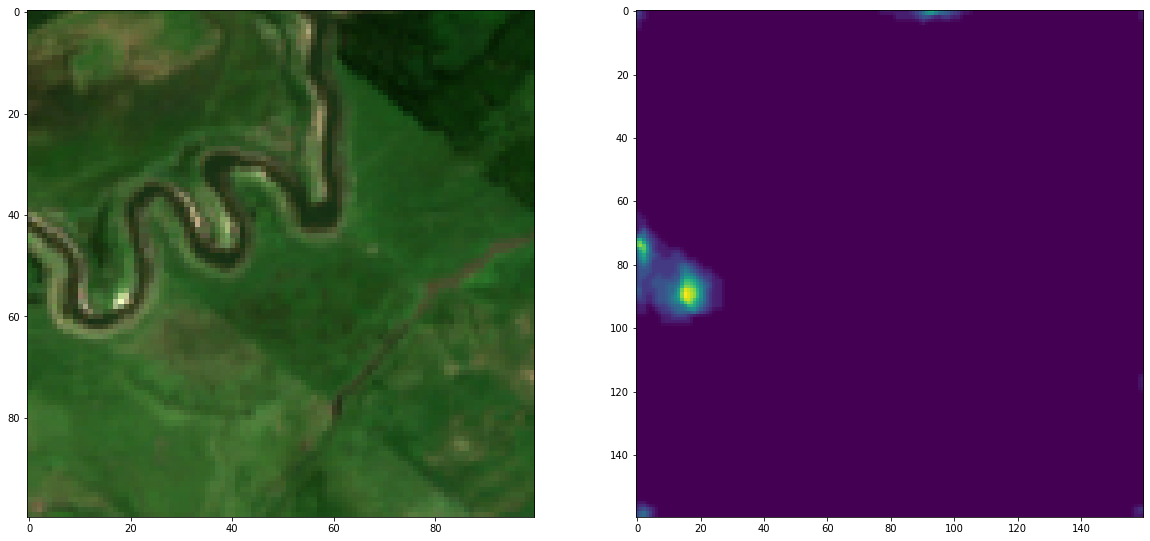

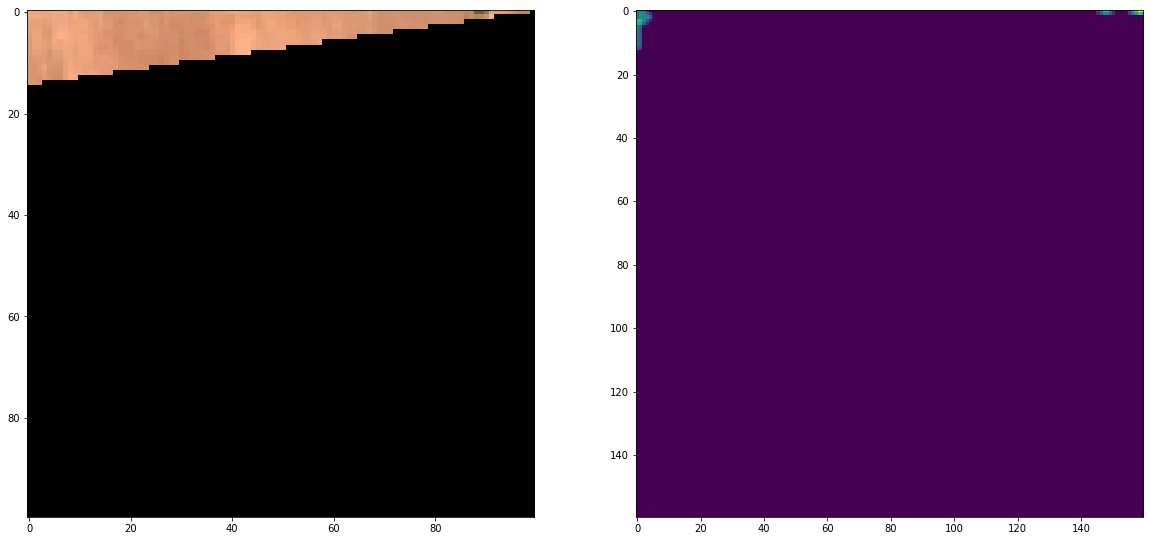

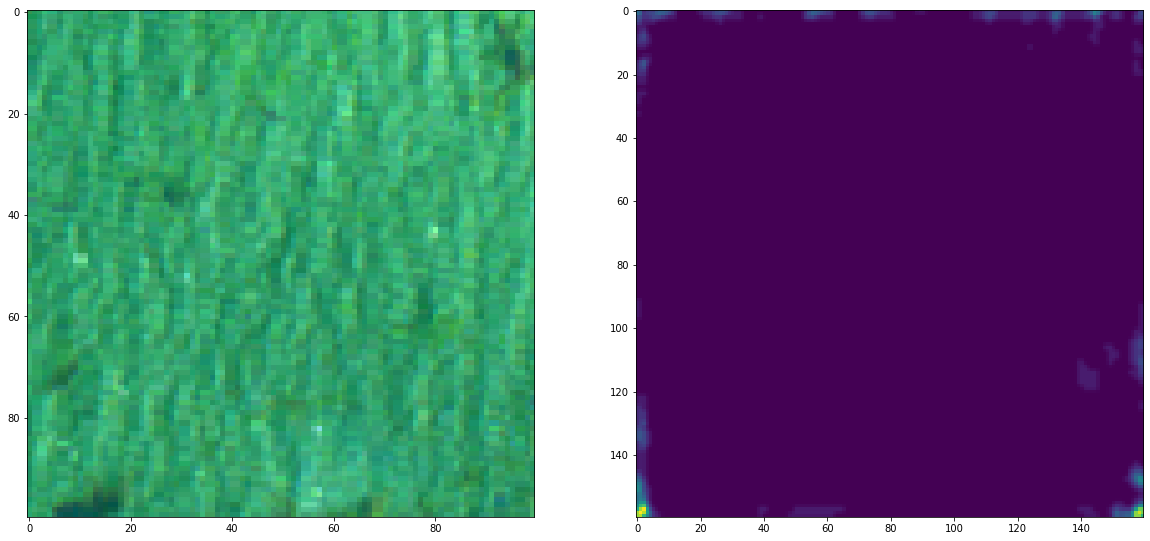

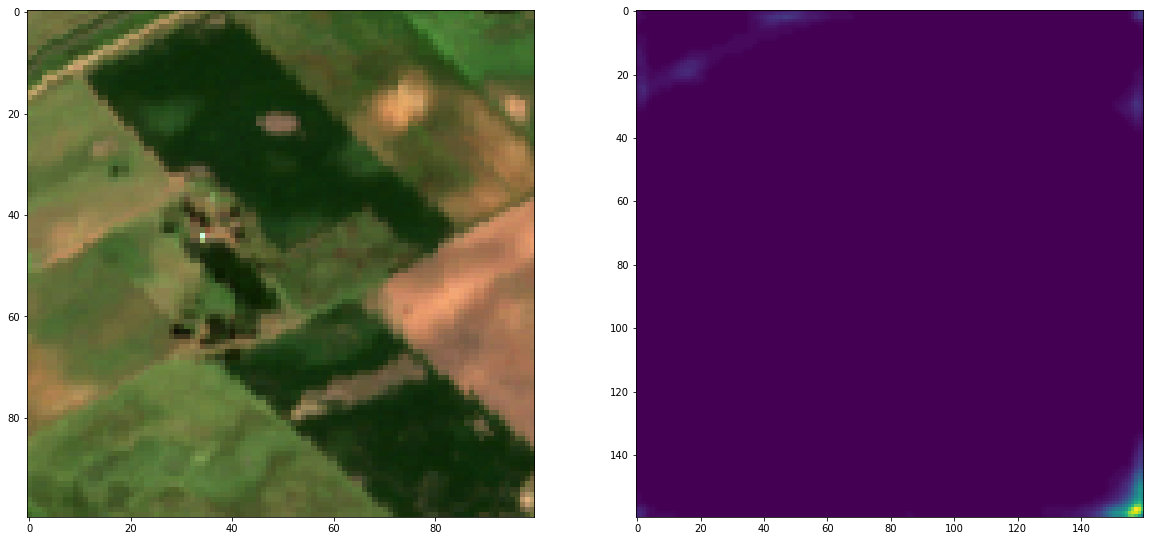

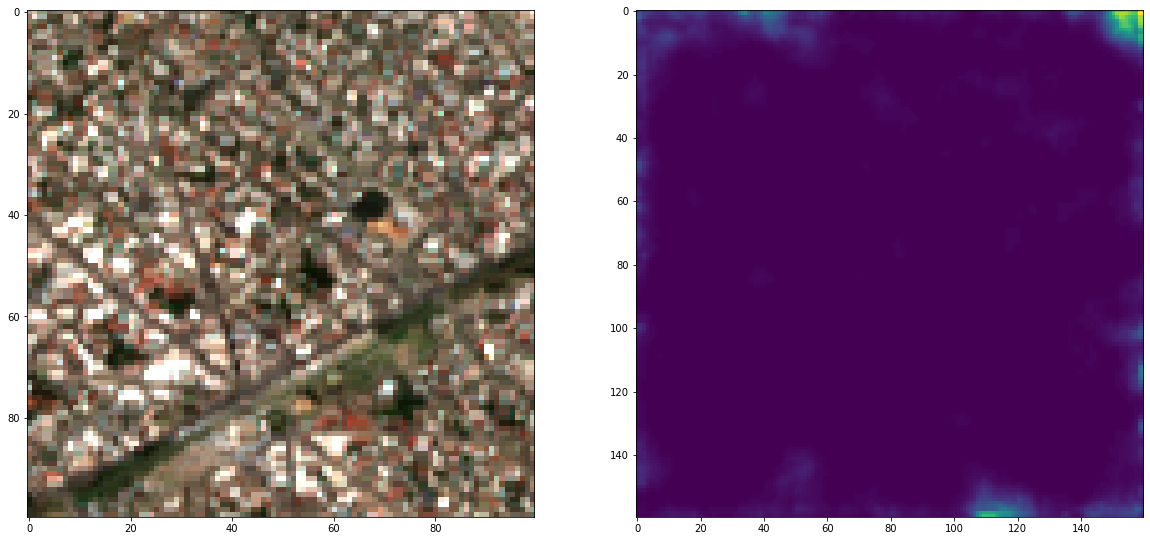

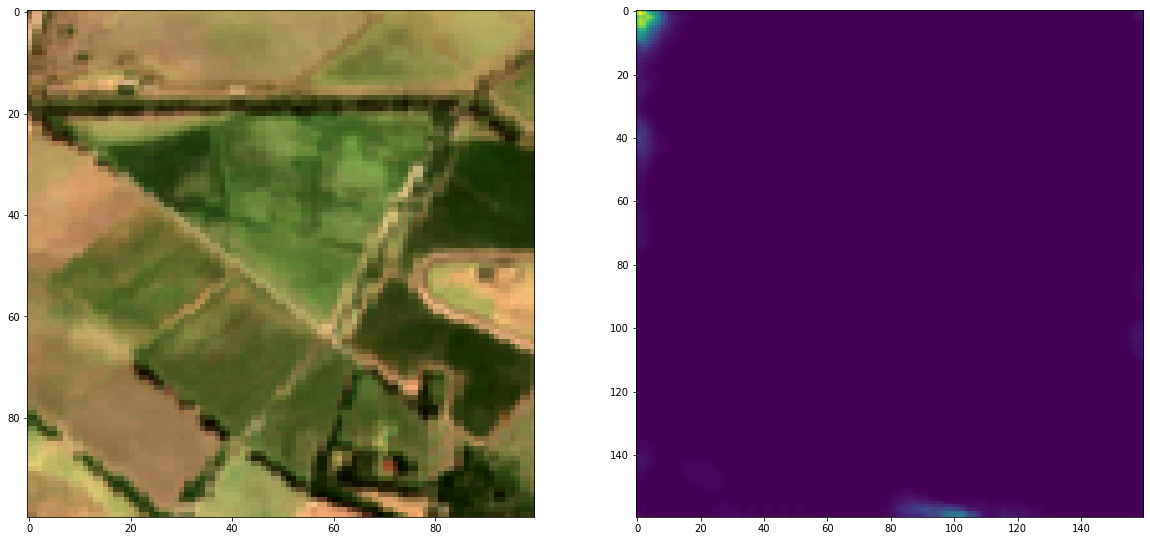

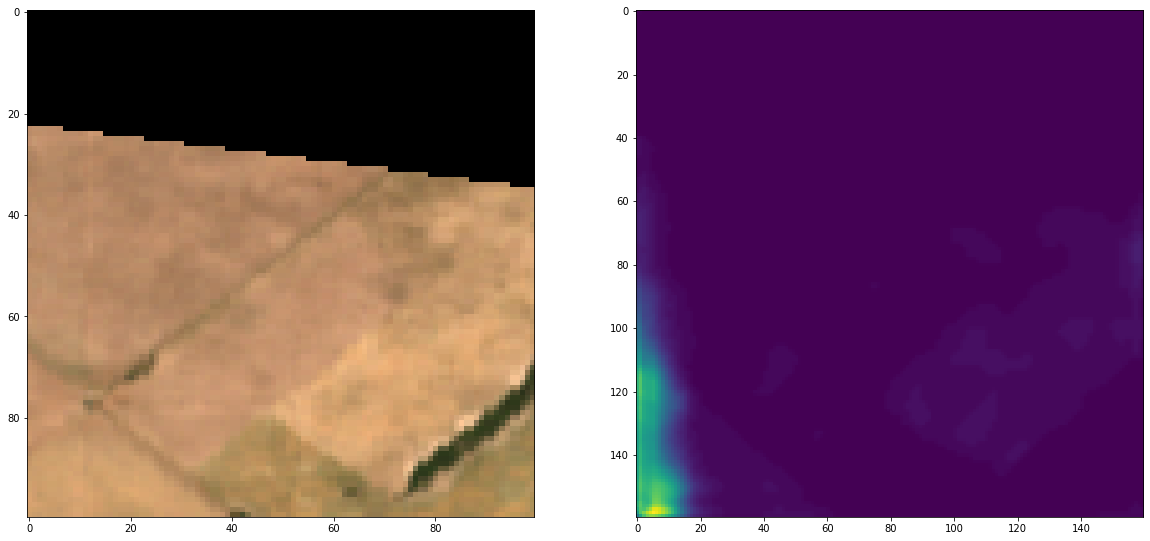

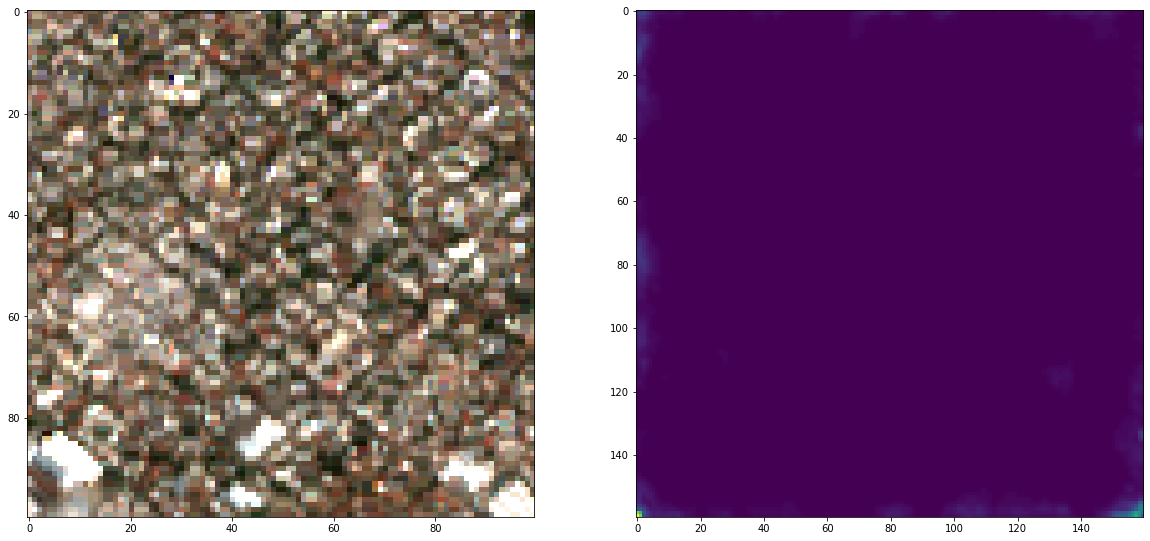

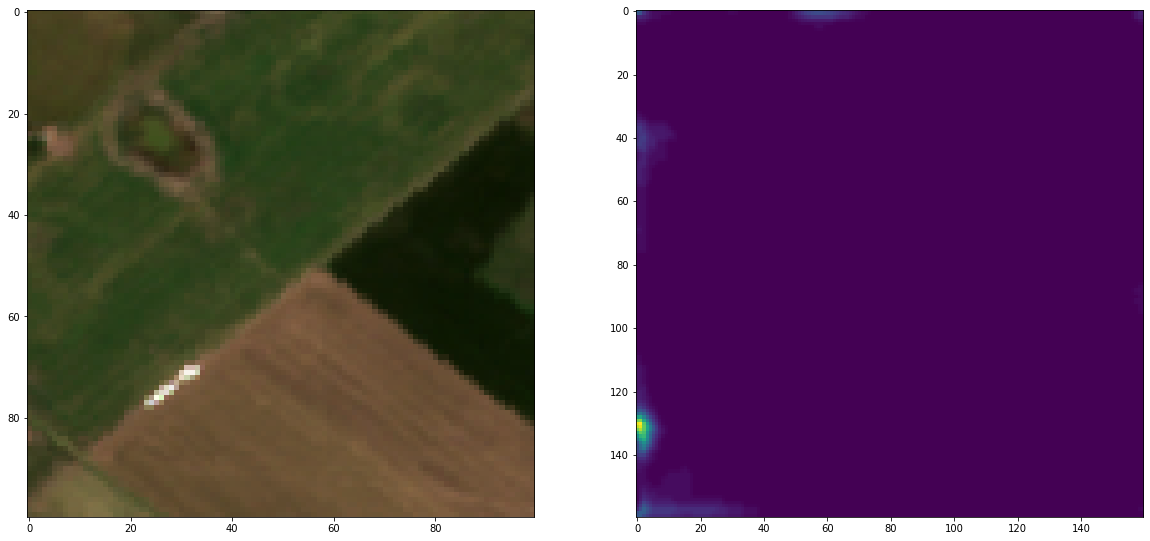

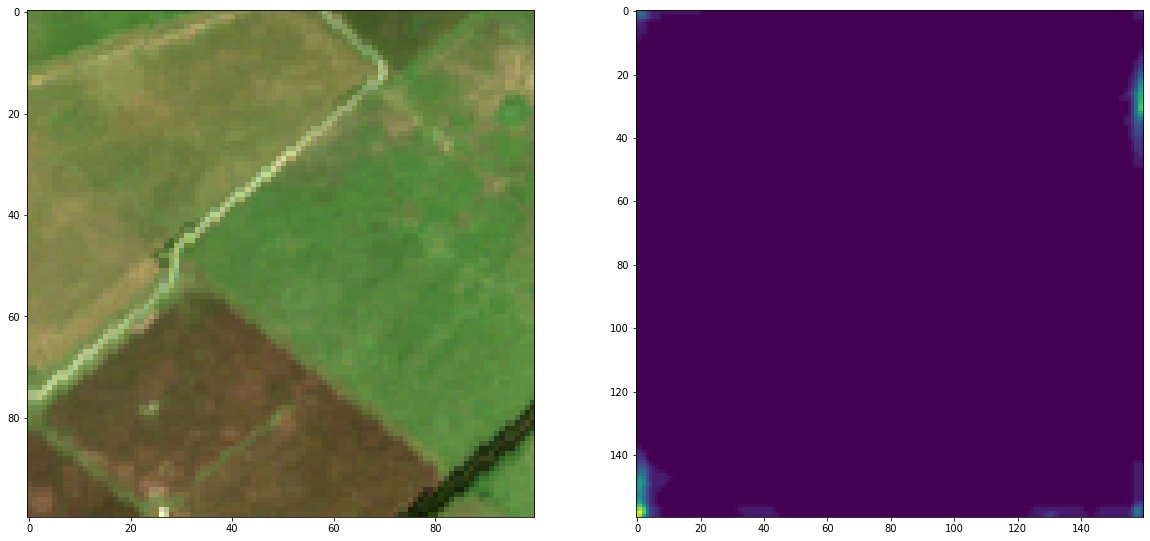

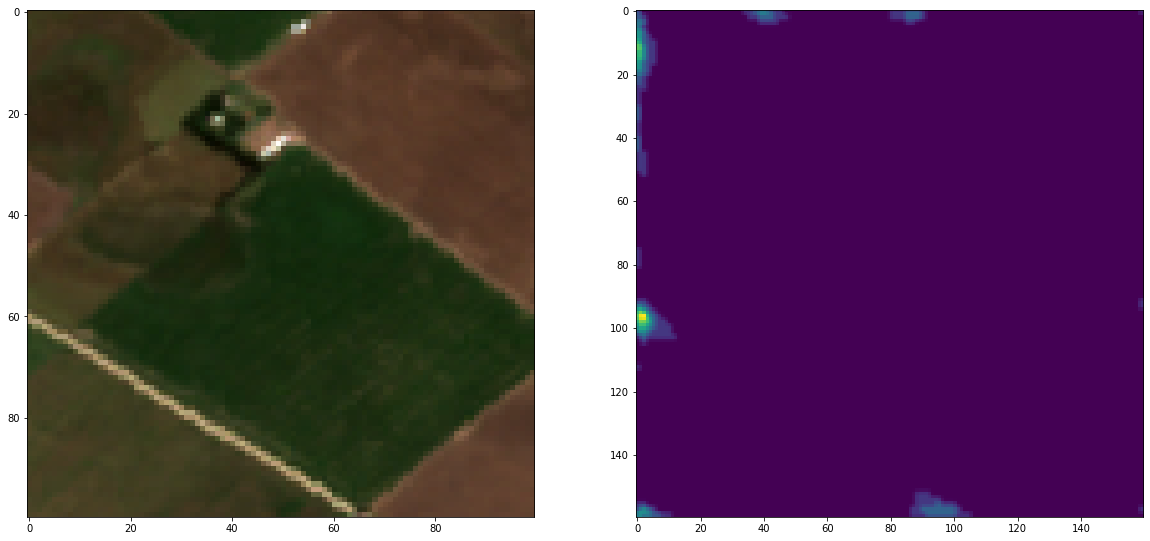

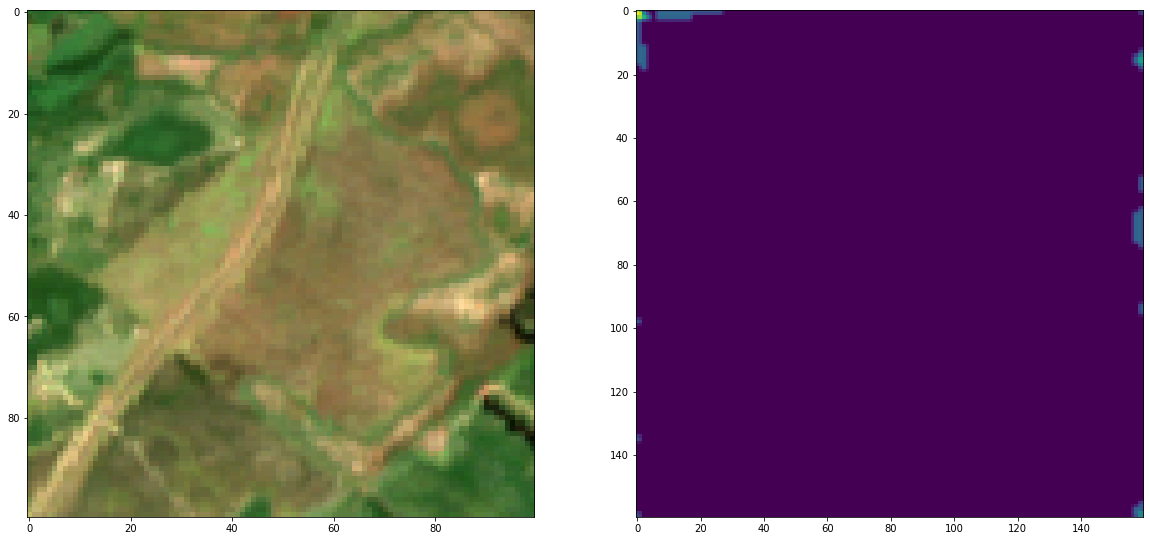

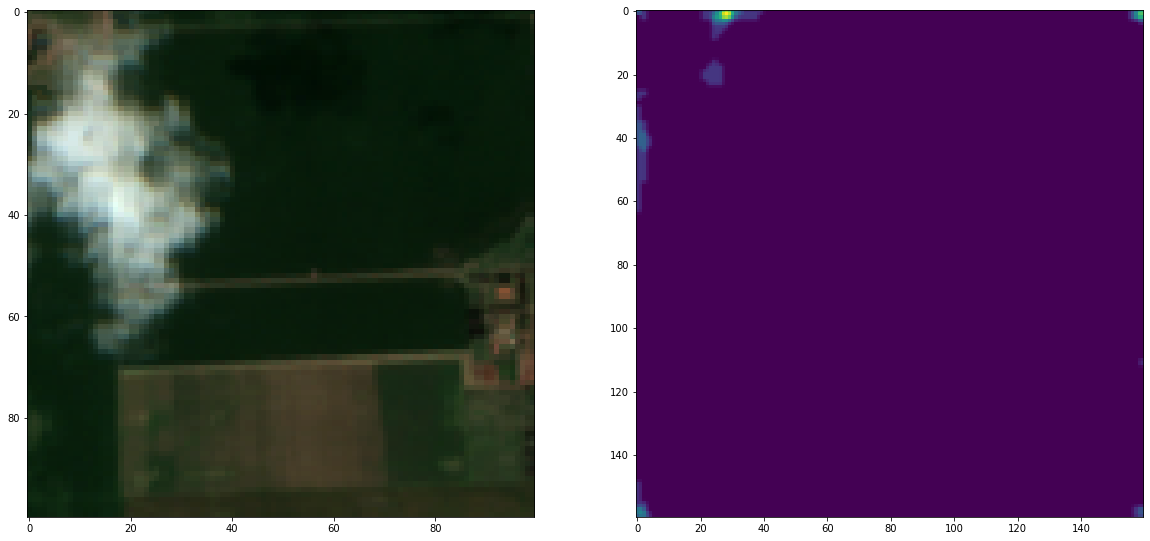

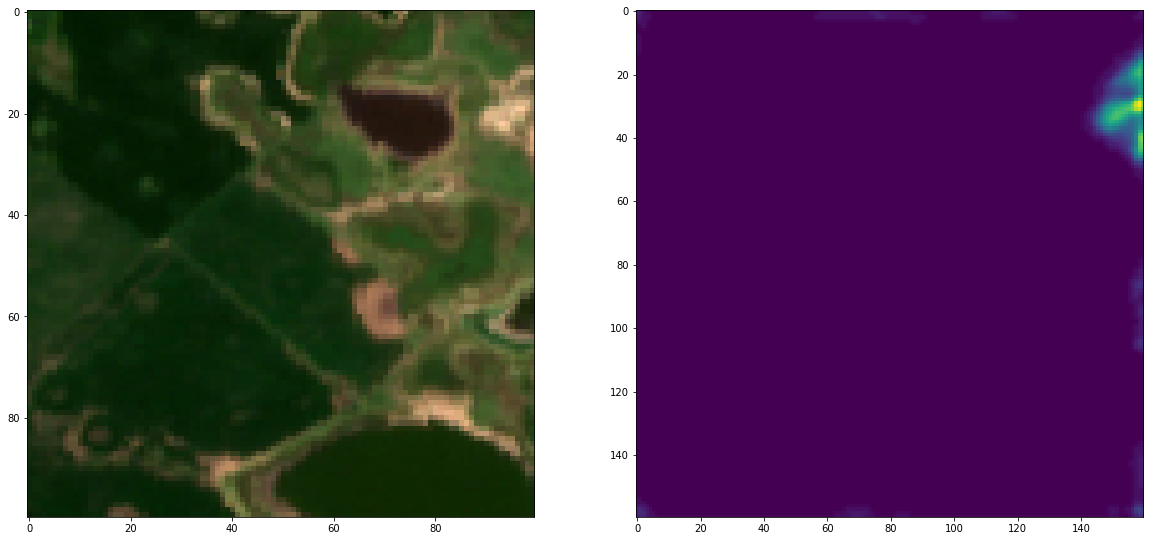

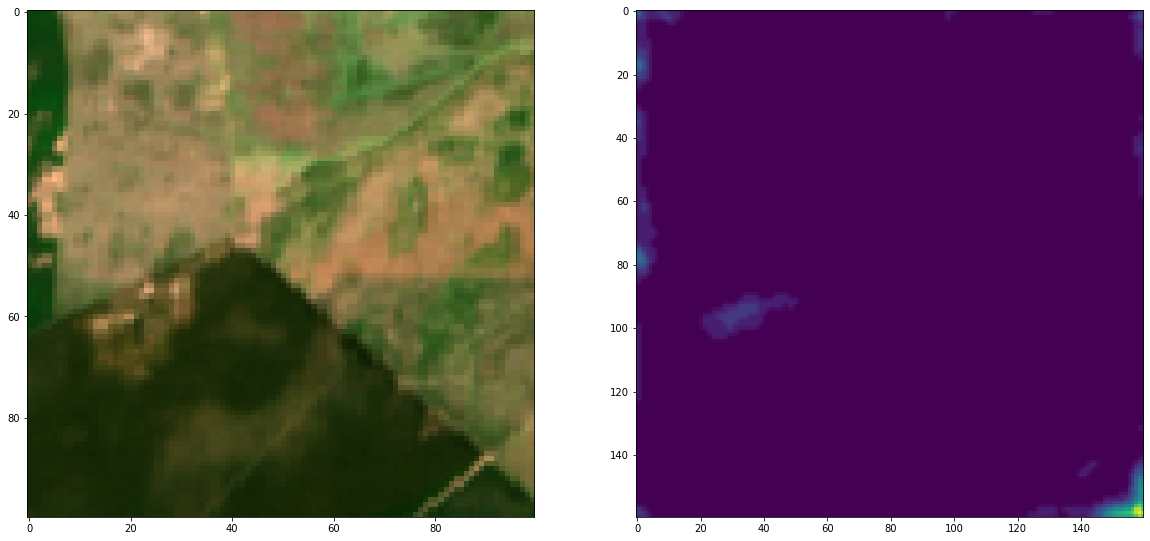

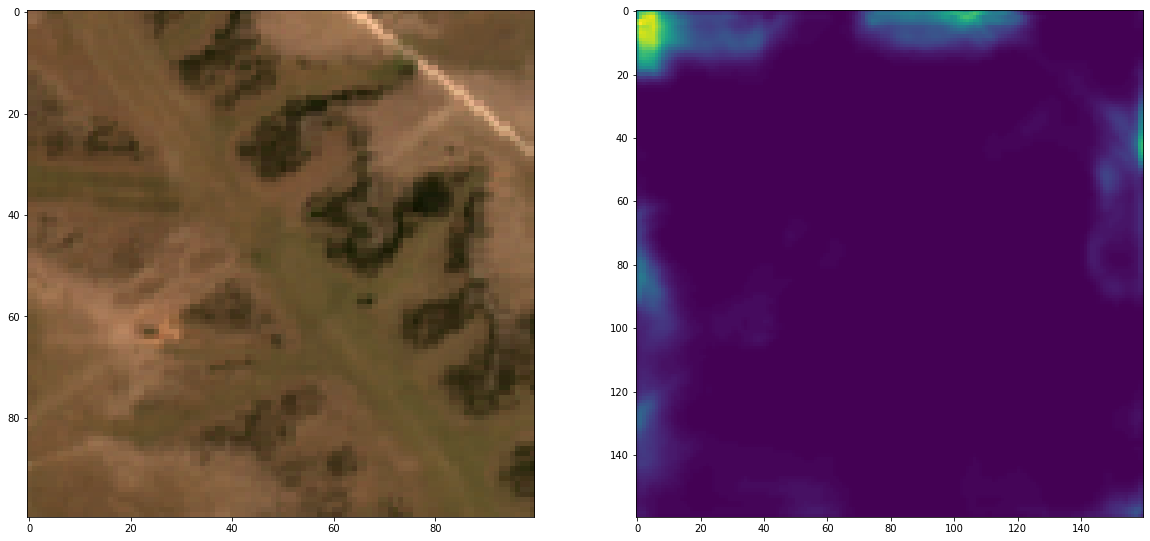

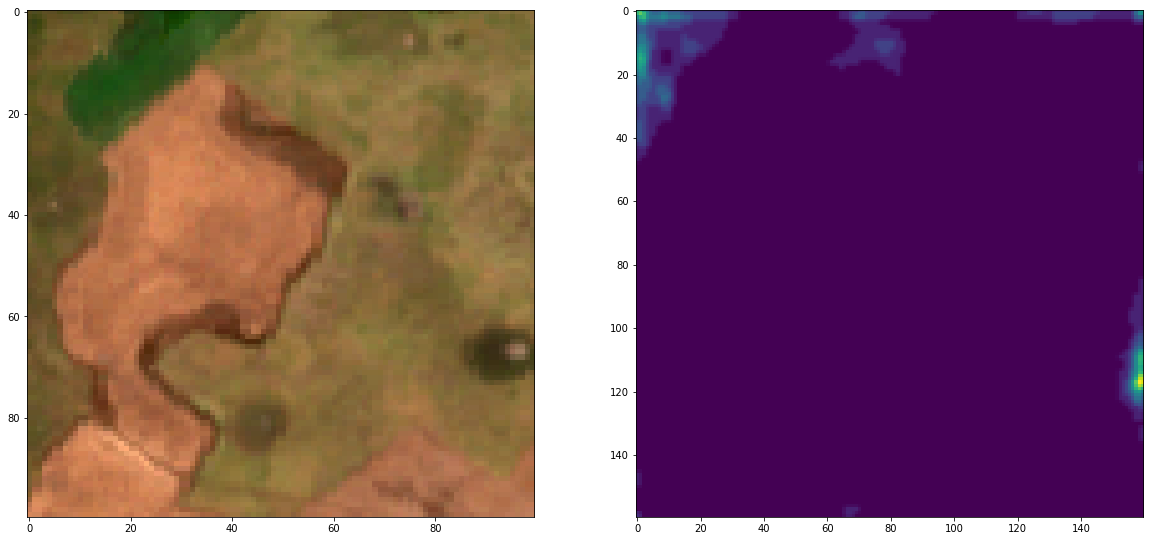

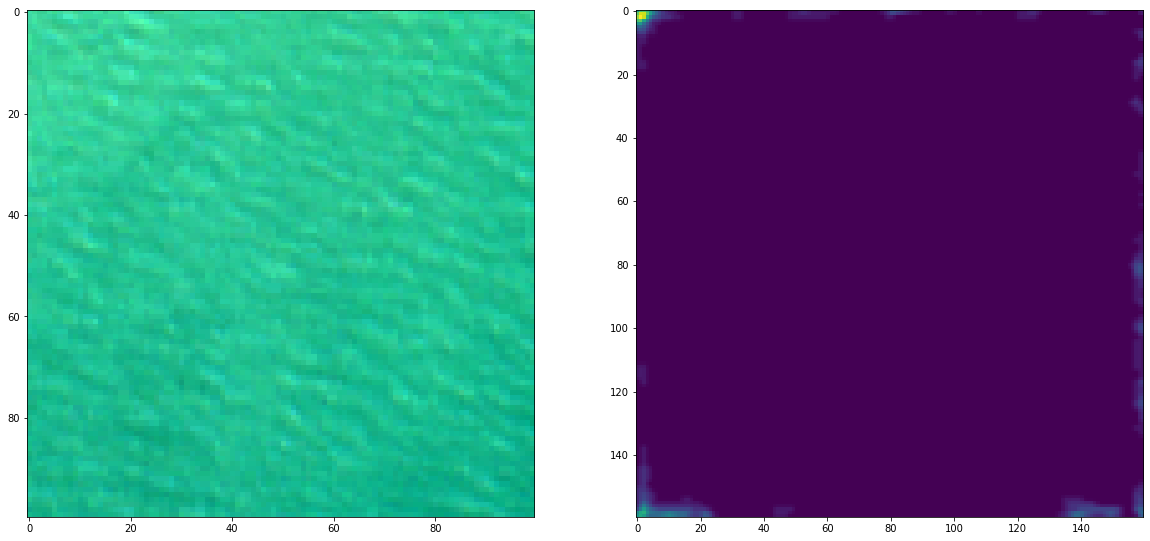

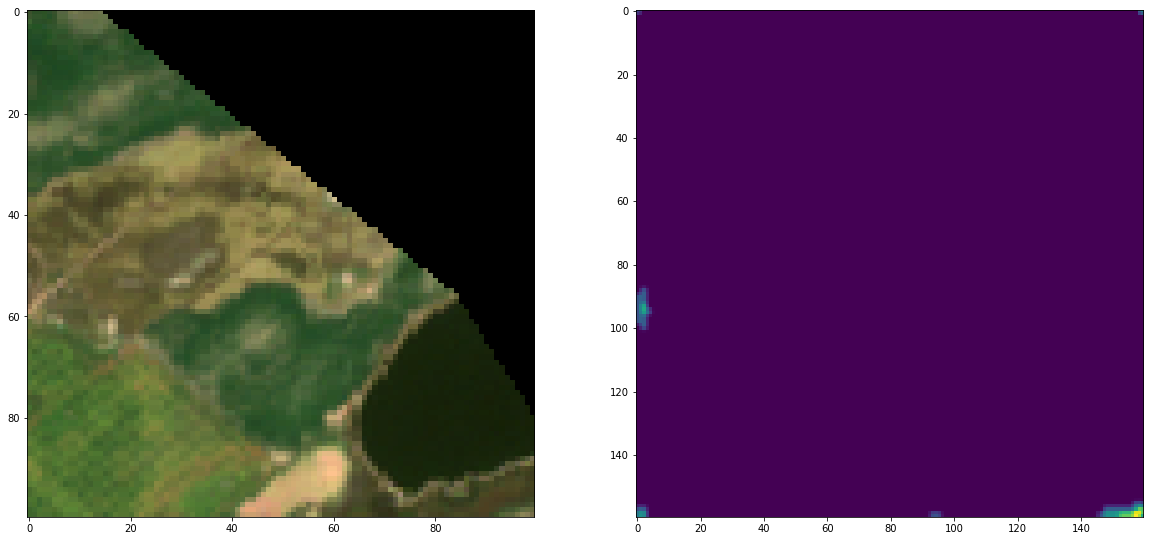

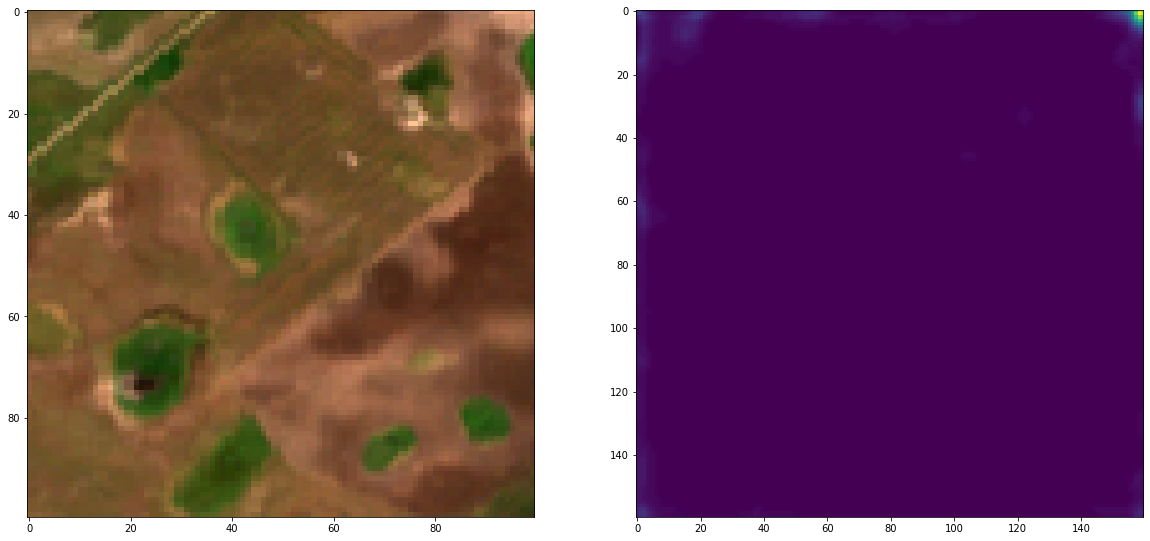

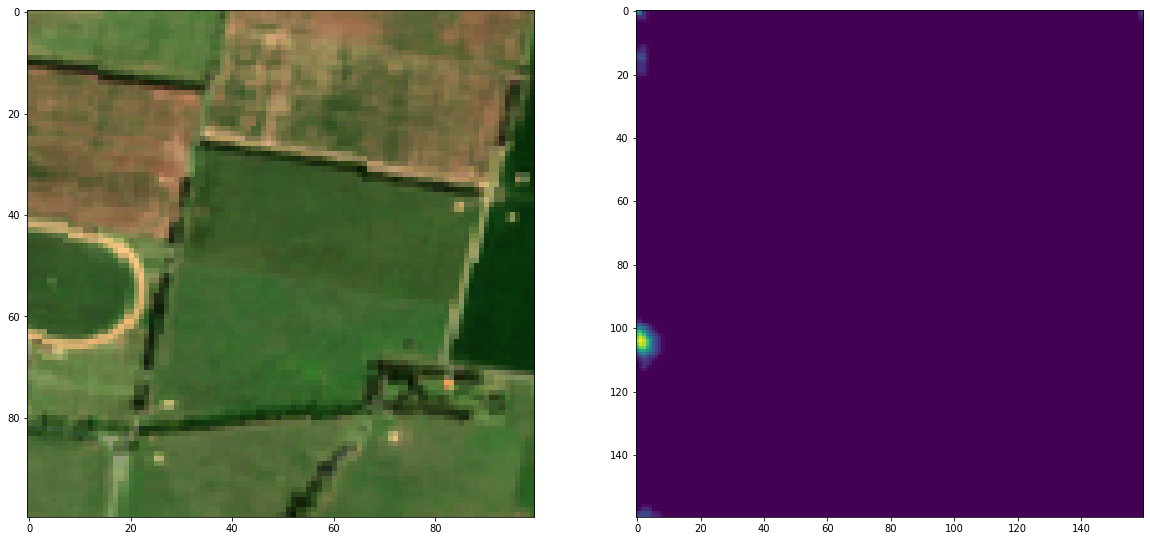

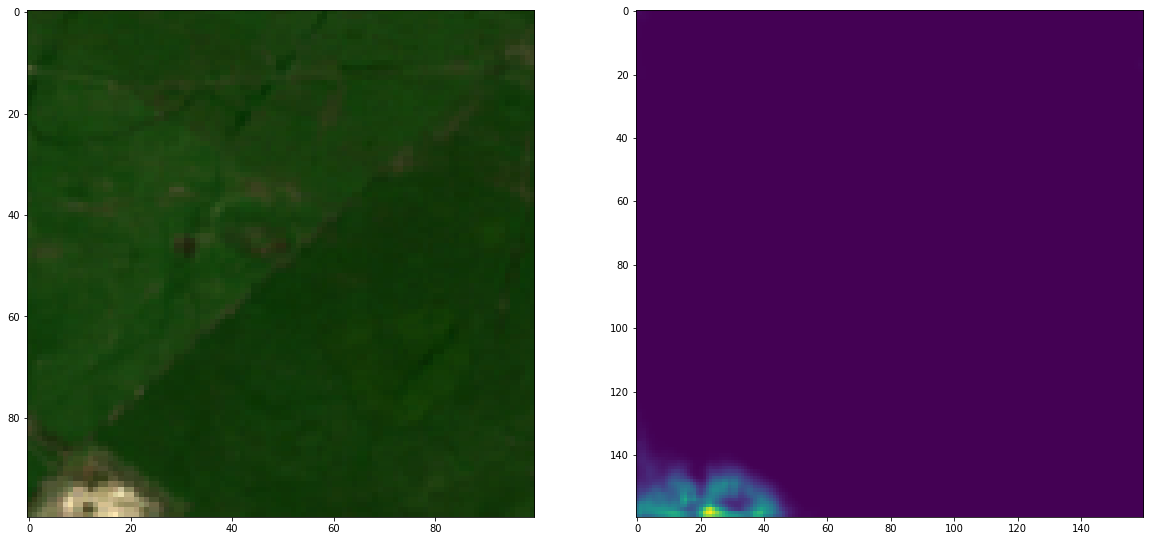

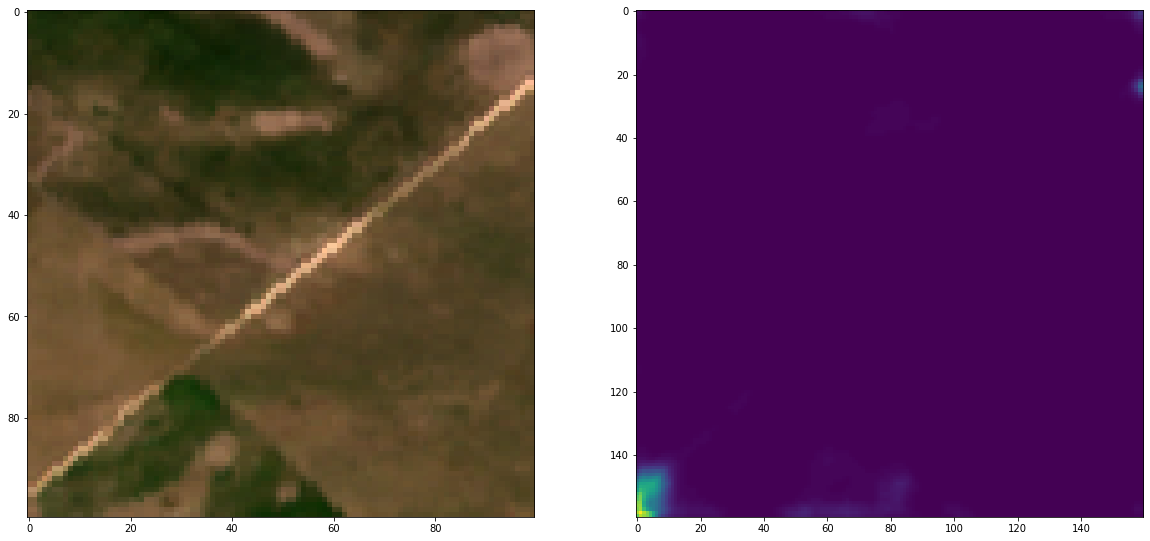

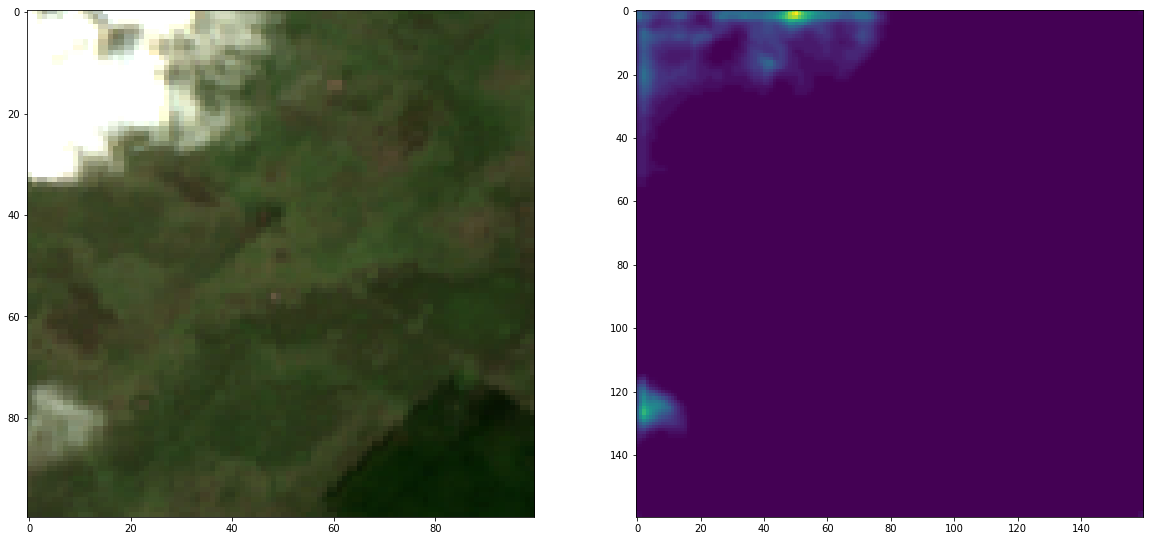

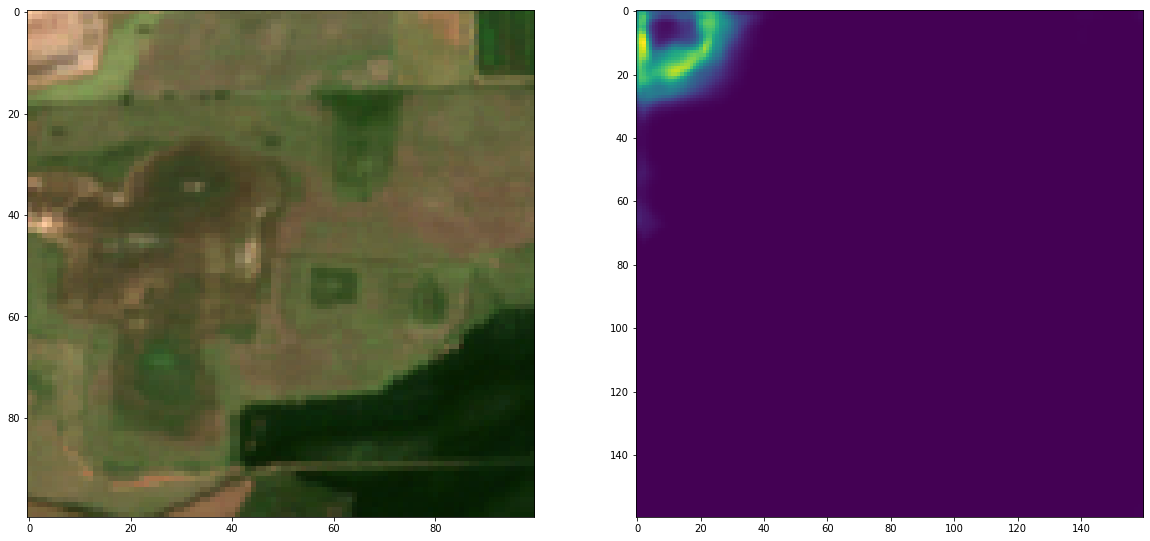

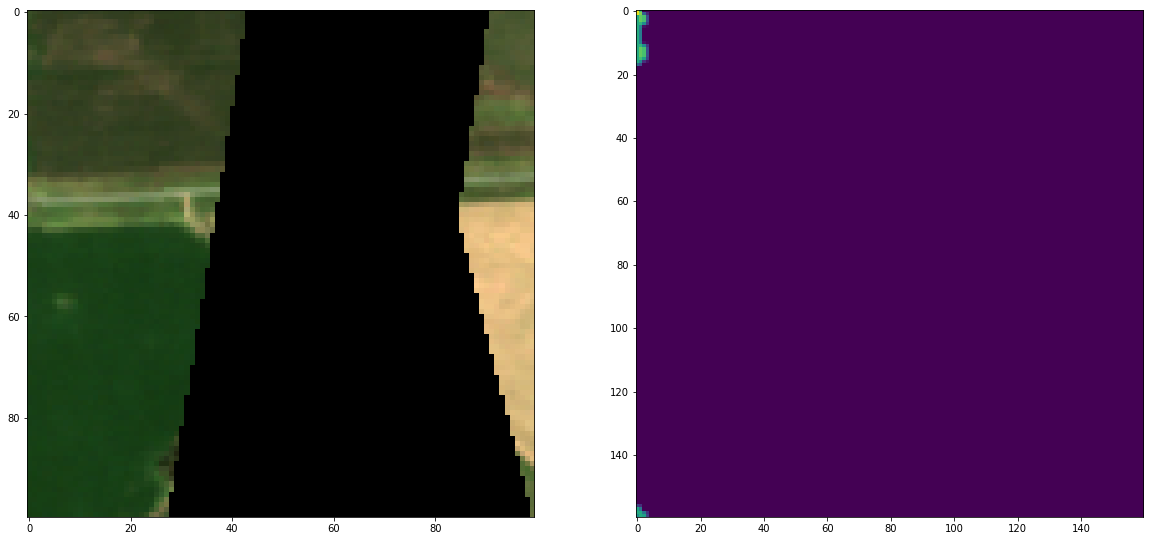

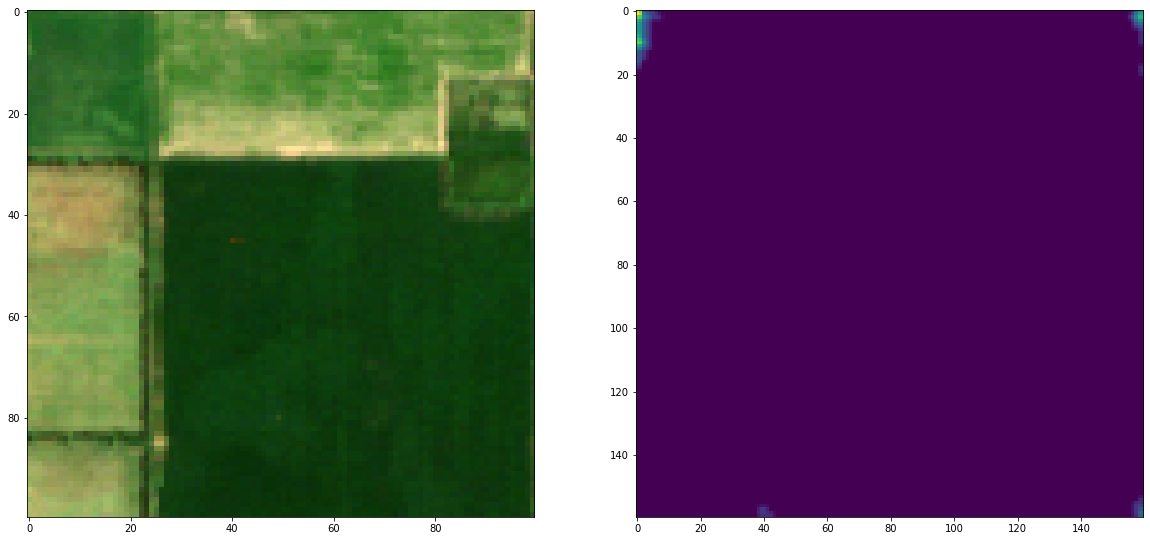

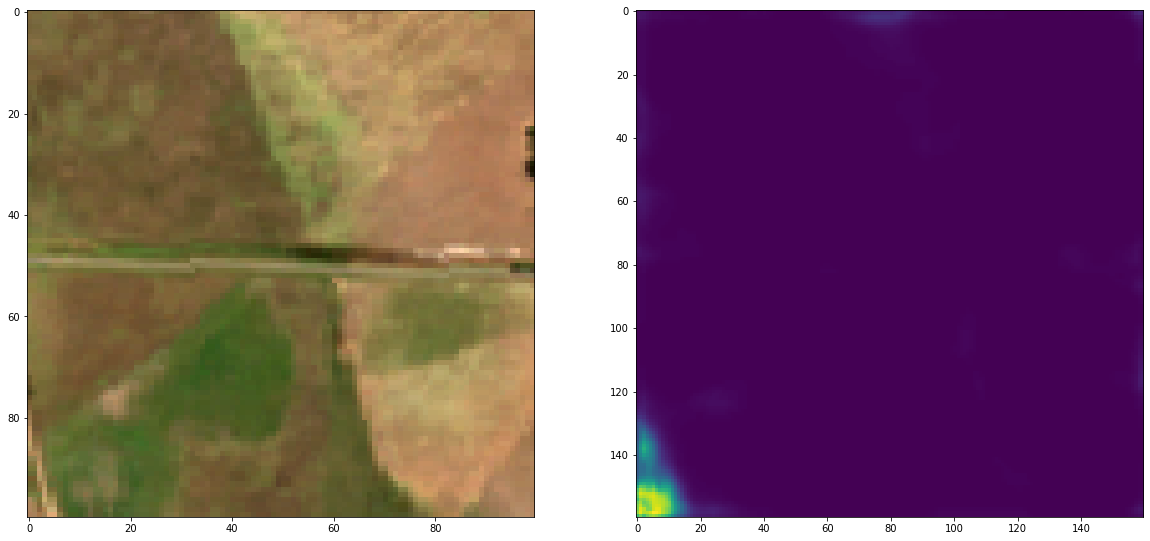

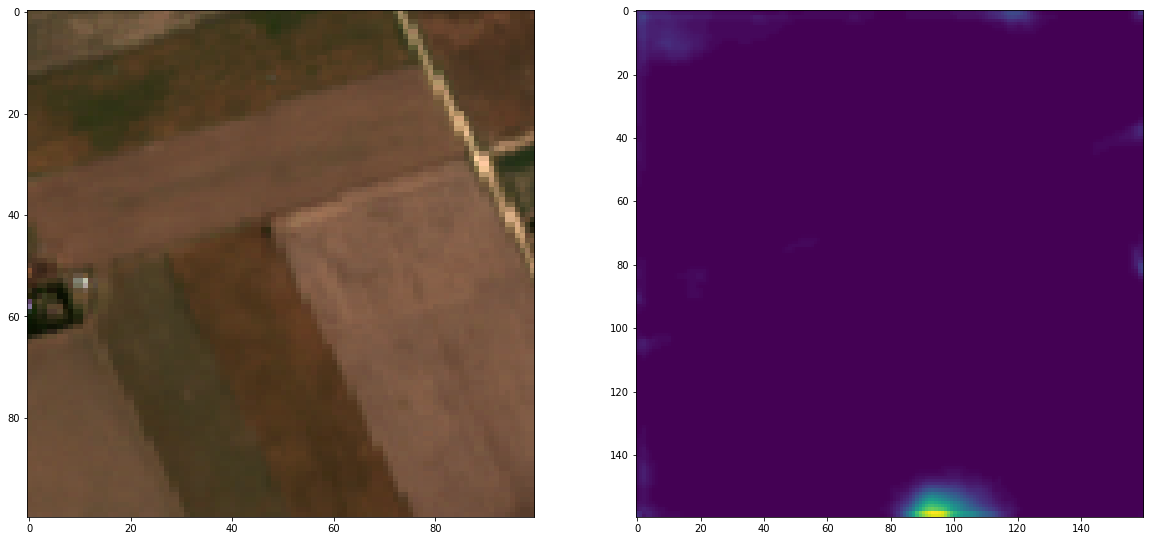

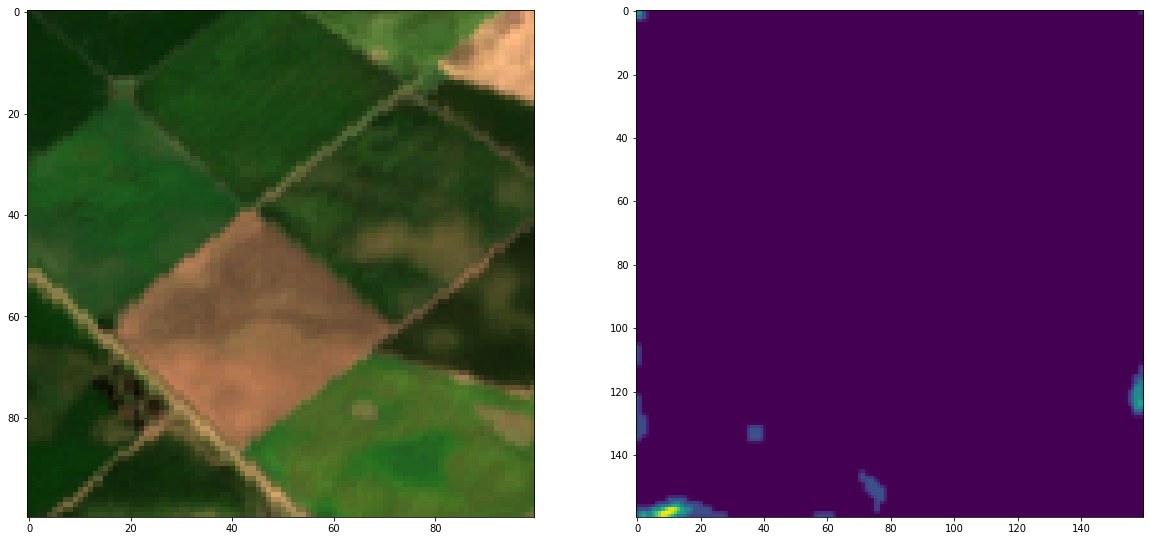

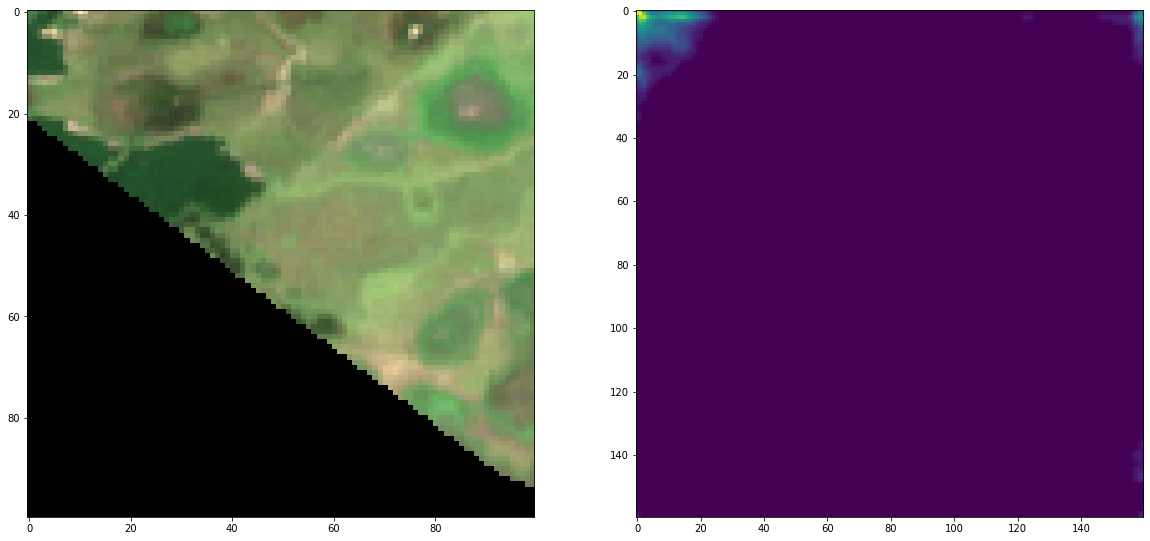

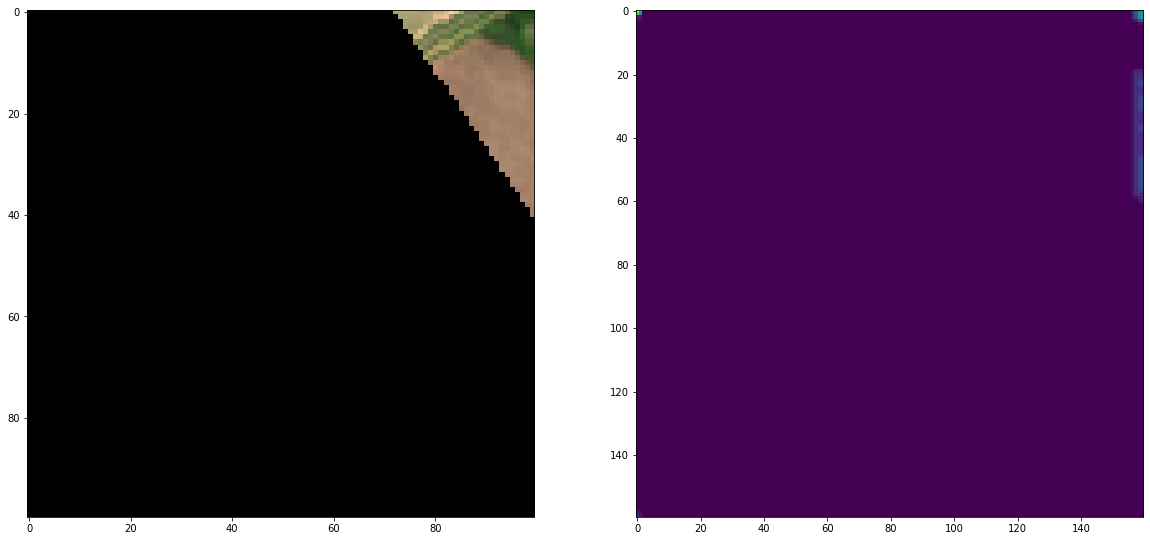

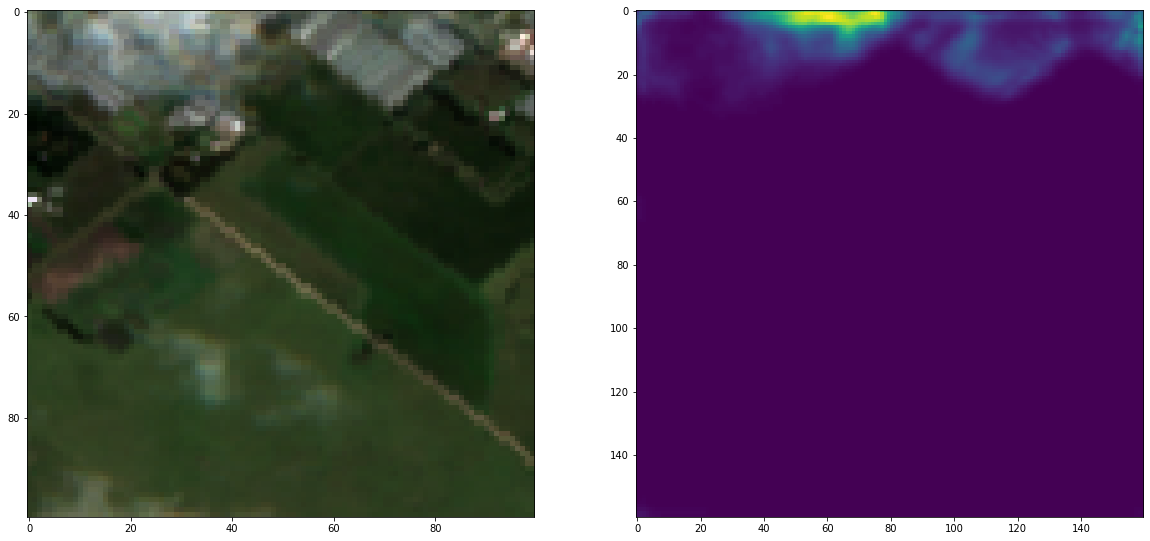

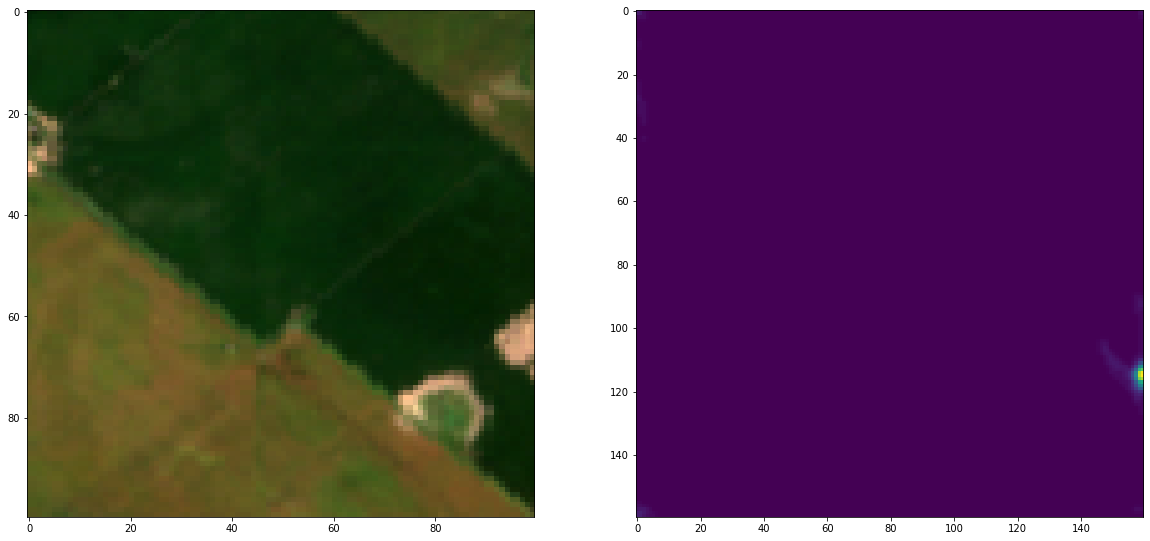

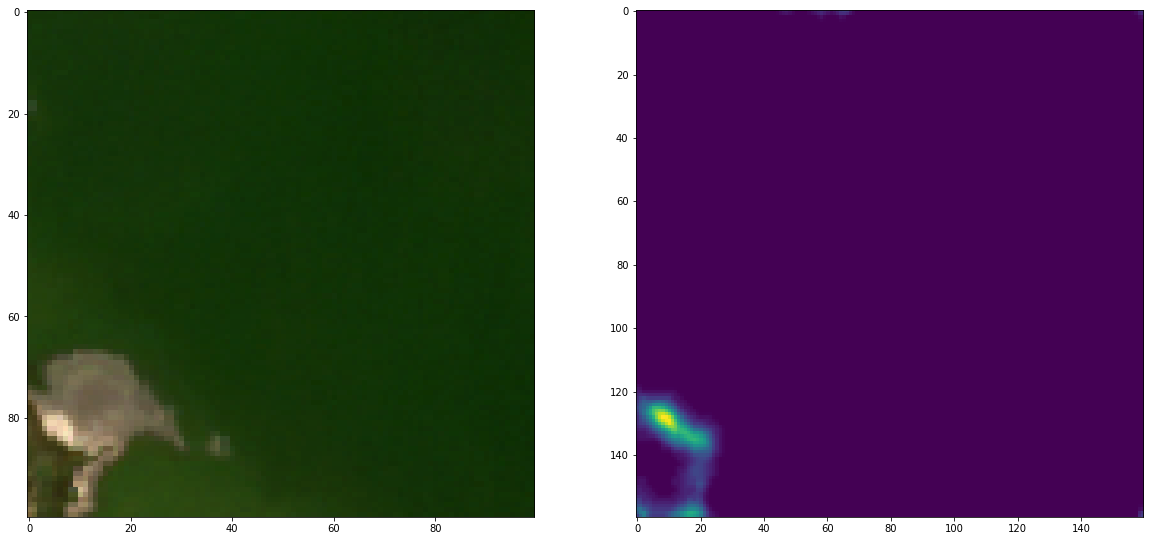

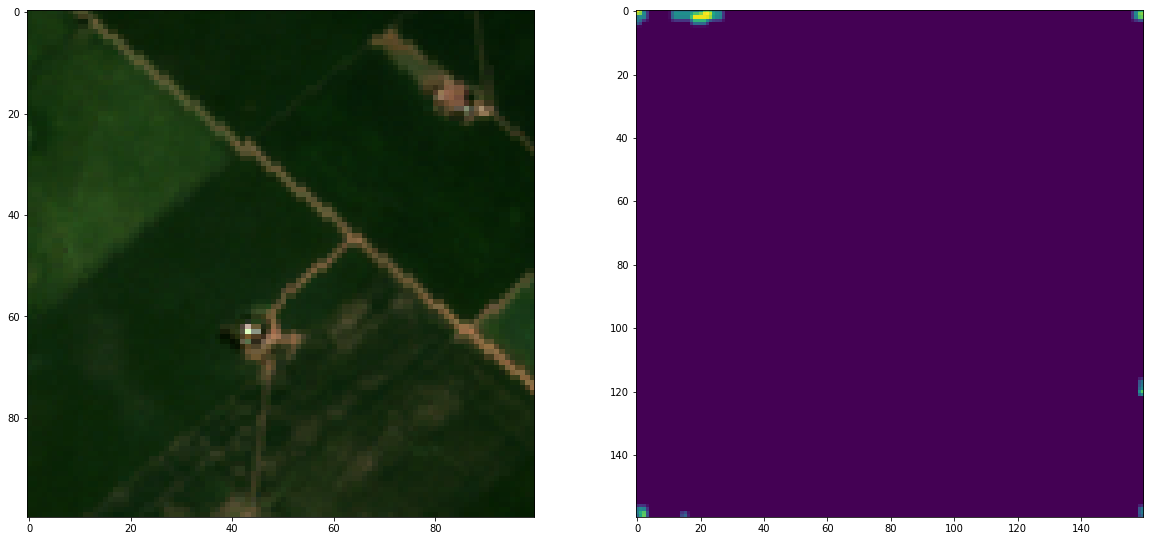

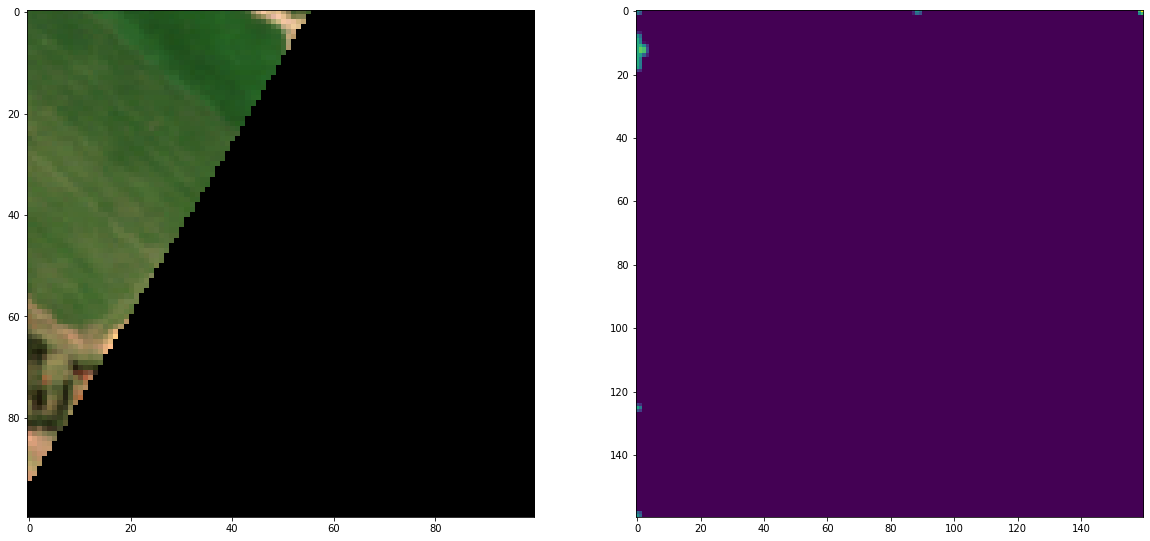

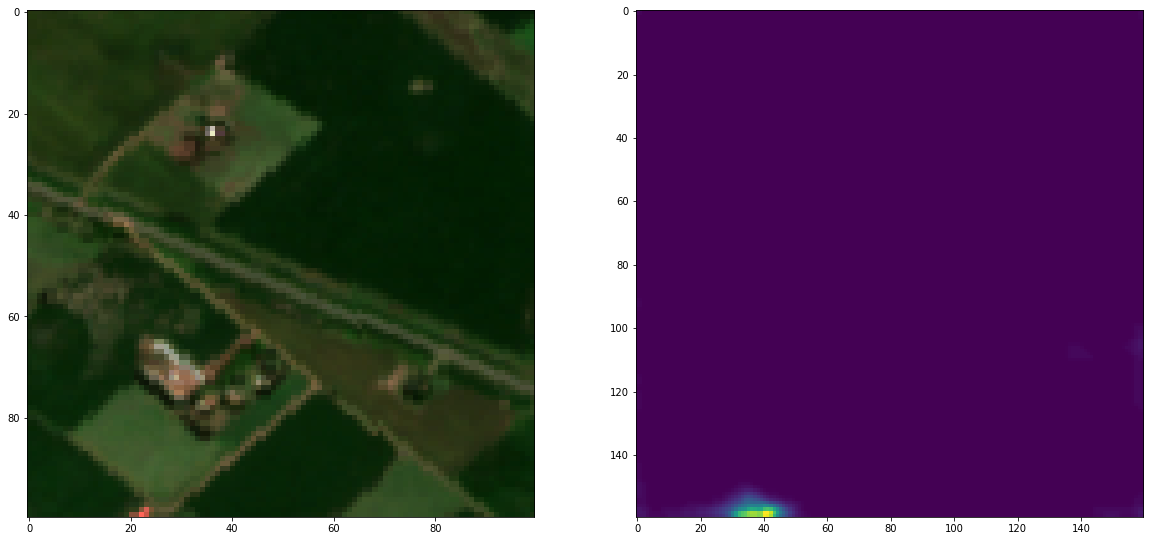

In [13]:
plot_data_results(num_samples=50, fig_size=(5, 5), predict_config=predict_config, img_ch =3)